## 25-26: 4369 -- PROGRAMMING FOR DATA ANALYTICS  
## Topic 03 :Acquiring Data  

# Assignment 3 domains  
Author:  Niall Naughton  
Date:  12/10/2025  

***
Create a notebook called assignment03-pie.ipynb
The note book should have a nice pie chart of peoples email domains in the csv file at the url
https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download
This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:
* Just creating the pie chart
* Making it look nice
As always your code should be well laid out.

If you are having difficulties, know I will be doing more on Pie charts later in this module.
***


### Investigating the Data Source:   
The Data is sourced from the URL :   
https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download  

Protocol: HTTPS  
Host: drive.google.com  
Resource: id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK  (people-1000.csv)

The file **people-1000.csv** is a comma separated file with 1000 rows of data and a header.
It has 9 Columns :  
*Index  
User Id  
First Name  
Last Name  
Sex  
Email  
Phone  
Date of birth  
Job Title*


Lets use Pandas to load Data from and get info summary ...

In [1]:
import pandas as pd

data_url = 'https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download'
df = pd.read_csv(data_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


As per Assignment instructions, we are interested in the Email column and the list of unique domains (and later the counts for each domains)  
Lets try and list the unique domain names with python ...  
*(Note use of square brackets and the resultant returned Series or Dataframe)*

In [2]:
emails_s = df['Email'] #Returns a Series object
emails_df = df[['Email']] #Returns a Dataframe object
# DataFrame object has no attribute 'unique' ... So lets use a Series

#separate out the email domain from Series and add new column to Dataframe
df['Domain'] = emails_s.str.split('@').str[1]

#look at the unique domain name

print(df['Domain'].unique())

#Look at the unique domain counts
domain_counts = df['Domain'].value_counts()
print(domain_counts)

['example.org' 'example.net' 'example.com']
Domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


***
## Plotting Unique Domain Counts   
Lets plot a basic Pie chart using **MatPlotLib** Library ...

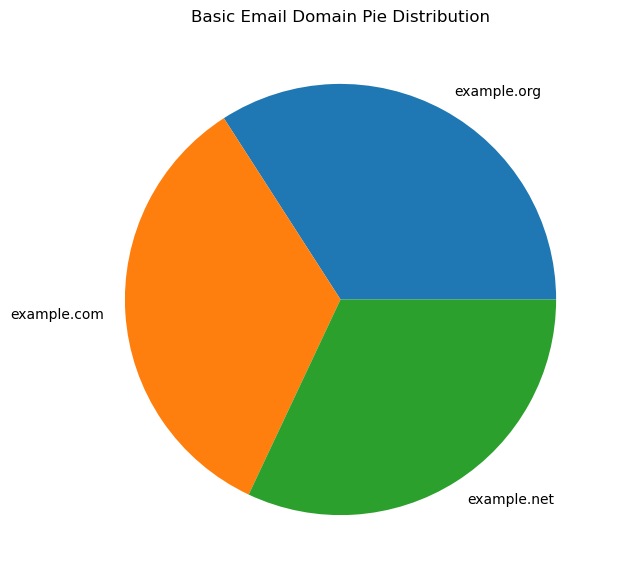

In [3]:
#import required modules 
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(7,7))
plt.pie(domain_counts, labels=domain_counts.index)
plt.title("Basic Email Domain Pie Distribution")
plt.show() 

***
Lets looks at more advanced formatting of a Pie Chart with Legend, Shadow and wedgeprops (with exploded slice)...   
Ref : https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html   
Tested in [my-work python file](<../my-work/Lab Topic 03/PieChart_test.py>)

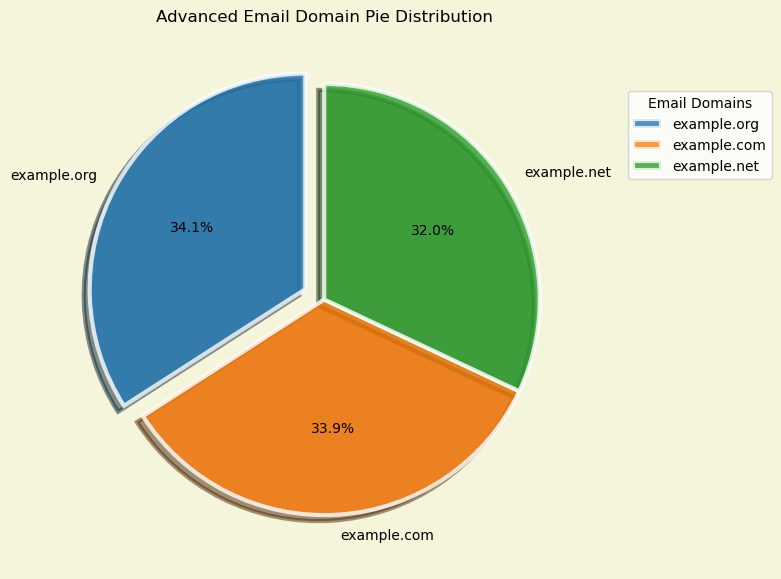

In [4]:

plt.figure(figsize=(7,7), facecolor = 'Beige')
wp = {'edgecolor': 'white', 'linewidth': 3, 'alpha': 0.8}  # slice style
explode = (0.1, 0.0, 0.0)  # only "explode" the 1st slice
plt.pie(
    domain_counts,
    labels=domain_counts.index,     # labels on slices
    explode=explode,                #explode slices
    autopct='%1.1f%%',              # percentage labels
    startangle=90,                  # start from top
    shadow=True,                    # add shadow effect
    wedgeprops=wp
)
plt.title("Advanced Email Domain Pie Distribution")

#Add a Legend
plt.legend(
    domain_counts.index,
    title="Email Domains",
    bbox_to_anchor=(1.05, 0.9),     # position to the right
    loc='upper left'
)
plt.show() 